<a href="https://colab.research.google.com/github/saransh317/Stock-Market-Prediction/blob/main/Reliance_Future_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
def plot_predictions(test, predicted):
  plt.plot(test, color='red', label='Real Reliance Stock Price')
  plt.plot(predicted, color='blue', label='Predicted Reliance Stock Price')
  plt.title("Stock Price Prediction")
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()

In [3]:
dataset = pd.read_csv('/content/RELIANCE.NS.csv', index_col='Date',
                      parse_dates=['Date'])
dataset.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-07,1940.599976,1965.000000,1940.599976,1958.199951,1958.199951,8418767.0
2020-12-08,1961.150024,2014.250000,1950.000000,1993.750000,1993.750000,20030506.0
2020-12-09,2009.949951,2033.800049,1999.250000,2026.949951,2026.949951,13464375.0
2020-12-10,2021.599976,2028.500000,2001.000000,2007.000000,2007.000000,7414229.0
2020-12-11,2013.000000,2038.000000,1974.250000,2005.800049,2005.800049,12434745.0


In [4]:
print(dataset.shape)
dataset.dropna(inplace=True)
dataset.shape

(6291, 6)


(6164, 6)

In [5]:
training_set = dataset[:'2020-12-11'].iloc[:,1:2].values
training_set.shape

(6164, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
training_set_scaled.shape

(6164, 1)

In [10]:
for i in range(60,5927):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [12]:
#RNN Architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
46/46 [==============================] - 10s 207ms/step - loss: 0.0050
Epoch 2/20
46/46 [==============================] - 10s 207ms/step - loss: 6.3257e-04
Epoch 3/20
46/46 [==============================] - 9s 206ms/step - loss: 5.4477e-04
Epoch 4/20
46/46 [==============================] - 10s 207ms/step - loss: 5.1887e-04
Epoch 5/20
46/46 [==============================] - 10s 207ms/step - loss: 4.9967e-04
Epoch 6/20
46/46 [==============================] - 10s 207ms/step - loss: 4.8648e-04
Epoch 7/20
46/46 [==============================] - 10s 208ms/step - loss: 4.6941e-04
Epoch 8/20
46/46 [==============================] - 10s 208ms/step - loss: 4.5899e-04
Epoch 9/20
46/46 [==============================] - 10s 210ms/step - loss: 4.3202e-04
Epoch 10/20
46/46 [==============================] - 10s 209ms/step - loss: 4.3548e-04
Epoch 11/20
46/46 [==============================] - 10s 210ms/step - loss: 4.1712e-04
Epoch 12/20
46/46 [==============================] - 10s 

In [20]:
dataset_total = pd.concat((dataset["High"][:'2019'], dataset['High']['2019':]), axis=0)
input = dataset_total[len(dataset_total) - 90:].values
input = input.reshape(-1,1)
inputs = sc.transform(input)

inputs.shape

(90, 1)

In [25]:
X_test = []
for i in range(60,90):
    X_test.append(inputs[i-60:i,0])

In [26]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [35]:
data = dataset["High"]['2020-08-01':'2020-12-11'].to_numpy()

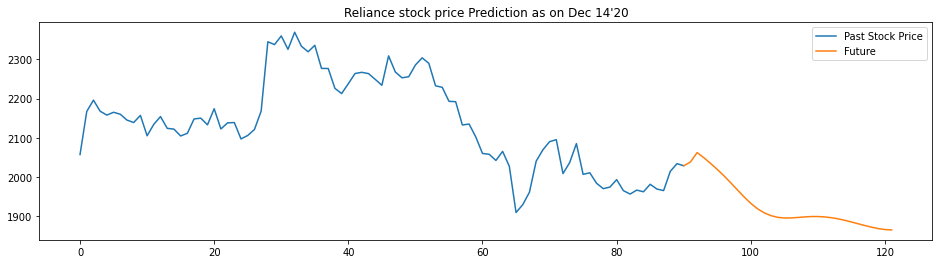

In [61]:
a = np.append(data,predicted_stock_price)
p = pd.DataFrame(a)
p[0][:91].plot(figsize=(16,4),legend=True)
p[0][90:].plot(figsize=(16,4),legend=True)
plt.legend(['Past Stock Price','Future'])
plt.title("Reliance stock price Prediction as on Dec 14'20")
plt.show()

In [62]:
max(p[0][-30:])

2062.077880859375

In [63]:
predictions = p[0][-31:]
predictions

91     2038.000000
92     2062.077881
93     2048.927246
94     2034.453247
95     2019.126099
96     2002.718628
97     1985.179077
98     1966.877808
99     1948.857422
100    1932.365845
101    1918.546753
102    1908.179321
103    1901.056519
104    1896.764404
105    1895.065918
106    1895.197876
107    1896.381470
108    1897.797607
109    1898.734985
110    1898.758301
111    1897.809326
112    1895.855591
113    1892.918457
114    1889.175415
115    1884.849365
116    1880.305664
117    1875.822266
118    1871.584473
119    1868.017456
120    1865.595947
121    1864.601196
Name: 0, dtype: float64

In [64]:
np.savetxt(fname="reliance-fall.csv", delimiter=",", X=predictions)